<h1 style="font-family:Georgia, Times New Roman ,Times,serif;text-align:center;">Workshop 1 &mdash; scikit-learn part I</h1>
<br>
<br>
<span style="font-family:Georgia, Times New Roman,Times,serif;">

    
This will be a brief but also quite decent (I hope ☺️) introduction to scikit-learn library. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

sns.set_style("darkgrid")

In [2]:
drugs = pd.read_csv("drug200.csv")

In [6]:
printer = lambda: print(50 * "-")
print(drugs.describe())
printer()
print(drugs.info())
printer()
print(drugs.isna().sum())
printer()

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
--------------------------------------------------
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64
------

<h3 style="font-family:Georgia, Times New Roman ,Times,serif;">EDA</h3>

<span style="font-family:Georgia, Times New Roman ,Times,serif;">
    
Good understanding of the data is the key to good modeling. 
    
The explanatory data analysis is not our main interest, so there will be almost no descriptions and conclusions below.

In [7]:
numerical = drugs[["Age", "Na_to_K", "Drug"]]
categorical = drugs.drop(["Age", "Na_to_K"], axis=1)
not_label = [label for label in categorical.columns if label != "Drug"]

<h5 style="font-family:Georgia, Times New Roman ,Times,serif;">Continous features</h5>

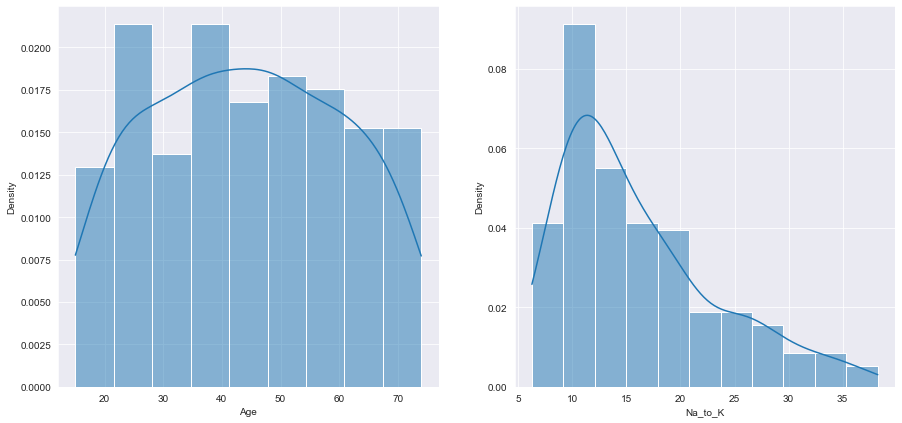

In [8]:
# histograms - distribution
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for i in range(2):
    sns.histplot(data=numerical.iloc[:, i], ax=ax[i], stat="density", kde=True)
plt.show()

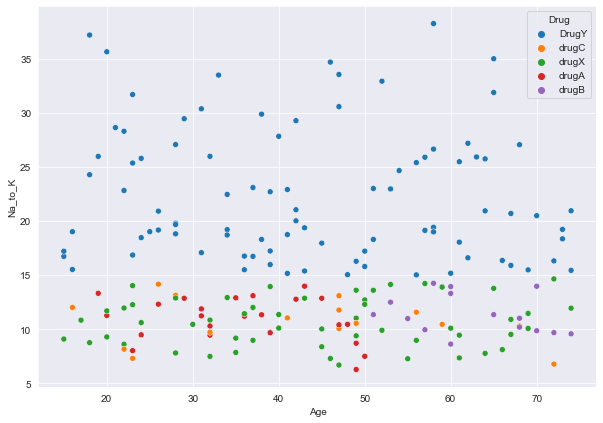

In [9]:
# scatterplot - correlation 
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(data=numerical, x='Age', y="Na_to_K", hue="Drug")
plt.show()

In [10]:
numerical.corr(method="pearson") # other methods: kendall, spearman

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


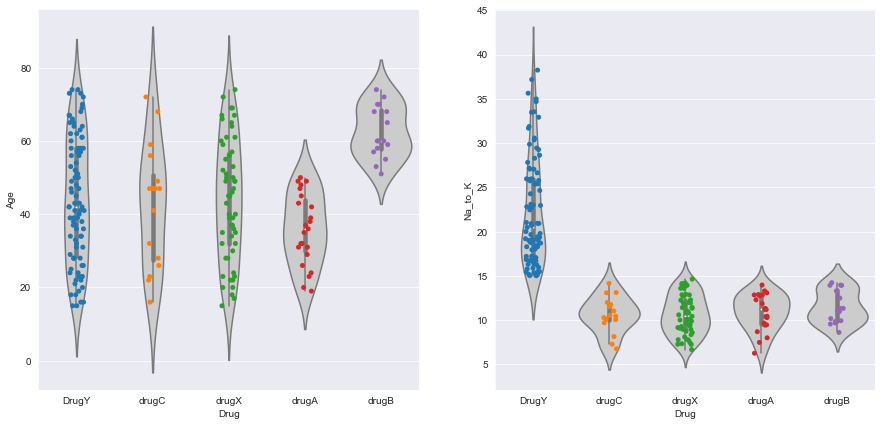

In [11]:
# violinplots + stripplots (in groups) - distribution 
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
for (idx, colname) in zip([0, 1], numerical.columns):
    sns.violinplot(data=numerical, x='Drug', y=colname, ax=ax[idx], color=".8")
    sns.stripplot(data=numerical, x='Drug', y=colname, ax=ax[idx])
plt.show()

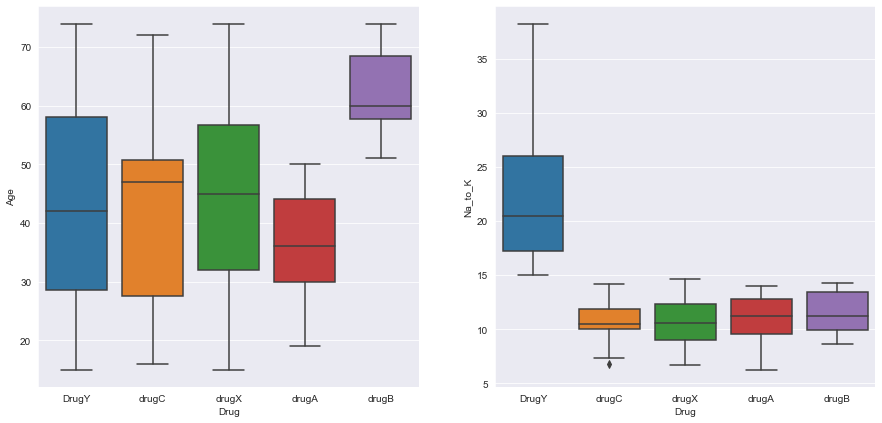

In [12]:
# boxplots - information about median, Q1, Q3, IQR
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
sns.boxplot(x='Drug', y='Age', ax=ax1, data=numerical)
sns.boxplot(x='Drug', y='Na_to_K', ax=ax2, data=numerical)
plt.show()

In [13]:
# aggregate functions
numerical.groupby("Drug").agg(["mean", "std", "median", iqr])

Age                             Na_to_K                     \
            mean        std median    iqr       mean       std   median   
Drug                                                                      
DrugY  43.747253  17.031731   42.0  29.50  22.374780  6.060195  20.4890   
drugA  35.869565   9.696786   36.0  14.00  10.918783  2.037642  11.2270   
drugB  62.500000   7.127412   60.0  10.75  11.524375  1.869919  11.1745   
drugC  42.500000  16.725230   47.0  23.25  10.633750  2.045009  10.4905   
drugX  44.018519  16.435685   45.0  24.75  10.650556  2.198091  10.5240   

                
           iqr  
Drug            
DrugY  8.75350  
drugA  3.24050  
drugB  3.53975  
drugC  1.84850  
drugX  3.28925

<h5 style="font-family:Georgia, Times New Roman ,Times,serif;">Categorical features</h5>

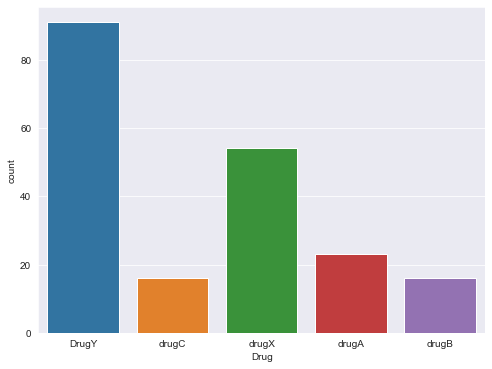

In [14]:
# countplots - well, counts ...
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=categorical, x="Drug")
plt.show()

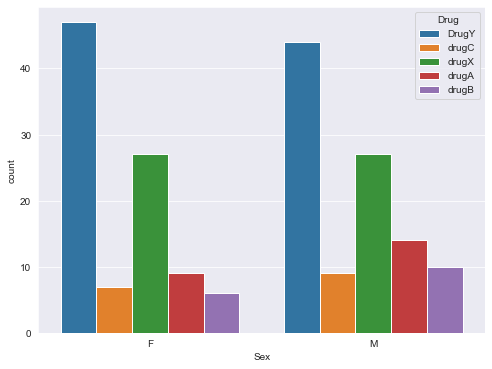

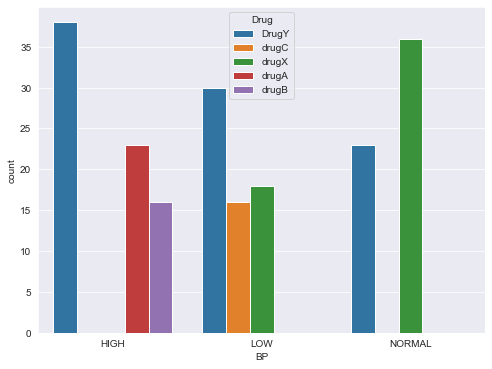

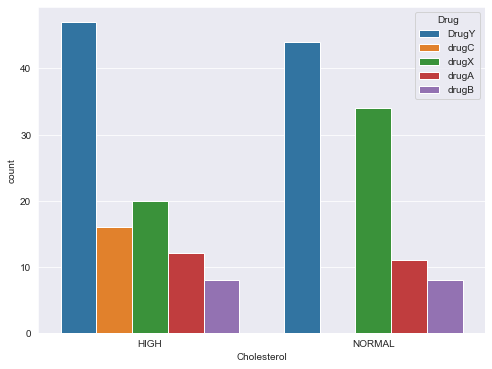

In [15]:
for i in not_label:
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.countplot(data=categorical, x=i, hue='Drug')
    plt.show()

<h3 style="font-family:Georgia, Times New Roman ,Times,serif;">Preprocessing the data</h3>

<span style="font-family:Georgia, Times New Roman ,Times,serif;">
Raw input data is usually inadequate for instant modeling. It needs to be pre-processed!

In [16]:
# continous features
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, # standarization, scaling
    normalize, Normalizer # normalization
)

# categorical features
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder
)

<span style="font-family:Georgia, Times New Roman ,Times,serif;">
    
There are other options for scaling like `RobustScaler`, `MaxAbsScaler`, and other tools for preprocessing, e.g., `KBinsDiscretizer`.

<h4 style="font-family:Georgia, Times New Roman ,Times,serif;"> Preprocessing the continous features</h4>

<span style="font-family:Georgia, Times New Roman ,Times,serif;">

`StandardScaler`: 
$$
\tilde{X} = \frac{X - \mu}{\sigma}.
$$

`Normalizer`:
$$
\tilde{X_{i.}} = \frac{X_{i.}}{||X_{i.}||_{L_{?}}}.
$$

`MinMaxScaler`:
$$
\tilde{X} = \frac{X - \min{X}}{\max{X} - \min{X}}.
$$

In [17]:
numerical = numerical.drop("Drug", axis=1)

In [18]:
# StandardScaler
scaler = StandardScaler()
scaler.fit(numerical)
rescaled = scaler.transform(numerical)
print(f"Mean: {list(np.mean(rescaled, axis=0))} \n Std: {list(np.std(rescaled, axis=0))}")

Mean: [1.354472090042691e-16, -8.43769498715119e-17] 
 Std: [1.0, 0.9999999999999998]


In [19]:
# more concisely
rescaled = StandardScaler().fit_transform(numerical)

In [20]:
# you can invert the changes
status_quo = scaler.inverse_transform(rescaled)
np.isclose(status_quo, numerical).sum() # there are 400 entries in numerical

400


<span style="font-family:Georgia, Times New Roman ,Times,serif;">
    
`StandardScaler` is probably the most widely used in case of contionus features.

In [21]:
# Normalizer - the rows have norm equal to 1 (either L1 or L2 norm)
normalizer = Normalizer()
normalizer.fit(numerical)
normalized = normalizer.transform(numerical)
print(f"Mean: {list(np.mean(normalized, axis=0))}, \n Std: {np.std(normalized, axis=0)}")

Mean: [0.9070736342084439, 0.36530963418449075], 
 Std: [0.10269992 0.18226085]


In [22]:
# what is the goal here?
(normalized ** 2).sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [23]:
# you can also use normalize
np.isclose(normalize(numerical), normalized).sum()

400

In [24]:
# MinMaxScaler
mms = MinMaxScaler()
mms_output = mms.fit_transform(numerical)
print(f"Mean: {list(np.mean(mms_output, axis=0))}, \n Std: {np.std(mms_output, axis=0)}")

Mean: [0.49686440677966104, 0.3069449308899868], 
 Std: [0.2797102  0.22533845]


<h4 style="font-family:Georgia, Times New Roman ,Times,serif;"> Preprocessing the categorical features</h4>

In [25]:
# ordinal encoding
ord_enc = OrdinalEncoder()
ord_enc.fit(categorical)
ordinal = ord_enc.transform(categorical)
print(ordinal[:4, :])
categorical.head(4)

[[0. 0. 0. 0.]
 [1. 1. 0. 3.]
 [1. 1. 0. 3.]
 [0. 2. 0. 4.]]


,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,DrugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX


In [26]:
ord_enc.inverse_transform(np.array([1, 1, 1, 1], ndmin=2))

array([['M', 'LOW', 'NORMAL', 'drugA']], dtype=object)

In [27]:
# one hot encoding
one_hot = OneHotEncoder()
one_hot_output = one_hot.fit_transform(categorical)
print(one_hot_output.toarray()) # by default a sparse array
print(f"\nSum of categorical features levels: {categorical.nunique().sum()}")
print(f"Number of features: {one_hot_output.shape[1]}")

[[1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]]

Sum of categorical features levels: 12
Number of features: 12


In [28]:
# all twelve vectors are redundant
one_hot_better = OneHotEncoder(drop="first")
one_hot_output = one_hot_better.fit_transform(categorical)
print(f"Number of features: {one_hot_output.shape[1]}")

Number of features: 8


<h4 style="font-family:Georgia, Times New Roman ,Times,serif;">Imputing missing data</h4>

In [29]:
from sklearn.impute import SimpleImputer

X = (np.linspace(4, 8, 500) * 2 + 5)
X = np.array([X, X**2]).T
X1 = X.copy()
np.random.seed(40)
indices = np.random.choice(np.arange(500), 50, replace=False)
X[indices, 0] = np.NaN
imp = SimpleImputer(missing_values=np.nan, strategy='mean').fit(X) # other options: median, ...
X_imputed = imp.transform(X)
print(len(np.unique(X_imputed)))
print(np.sqrt(((X1[:, 0] - X_imputed[:, 0])**2).sum() / 500))

951
0.7823187384552966


In [30]:
from sklearn.impute import KNNImputer

imp_knn = KNNImputer(n_neighbors=2).fit(X)
X_imputed_knn = imp_knn.transform(X)
print(len(np.unique(X_imputed_knn)))
print(np.sqrt(((X1[:, 0] - X_imputed_knn[:, 0])**2).sum() / 500))

1000
0.002890221463297822


<span style="font-family:Georgia, Times New Roman ,Times,serif;">
    
Also nice function &mdash; `pandas.fillna`.

<h4 style="font-family:Georgia, Times New Roman ,Times,serif;">Preprocessed data</h4>

In [31]:
df = pd.get_dummies(drugs, columns=list(set(categorical.columns) - {"Drug"}),
                    drop_first=True)
df[["Age", "Na_to_K"]] = StandardScaler().fit_transform(df[["Age", "Na_to_K"]])
df.head()

,Age,Na_to_K,Drug,BP_LOW,BP_NORMAL,Sex_M,Cholesterol_NORMAL
0,-1.291591,1.286522,DrugY,0,0,0,0
1,0.162699,-0.415145,drugC,1,0,1,0
2,0.162699,-0.828558,drugC,1,0,1,0
3,-0.988614,-1.149963,drugX,0,1,0,0
4,1.011034,0.271794,DrugY,1,0,0,0


In [32]:
Y = df["Drug"]
X = df.drop("Drug", axis=1)
X, Y

(          Age   Na_to_K  BP_LOW  BP_NORMAL  Sex_M  Cholesterol_NORMAL
 0   -1.291591  1.286522       0          0      0                   0
 1    0.162699 -0.415145       1          0      1                   0
 2    0.162699 -0.828558       1          0      1                   0
 3   -0.988614 -1.149963       0          1      0                   0
 4    1.011034  0.271794       1          0      0                   0
 ..        ...       ...     ...        ...    ...                 ...
 195  0.708057 -0.626917       1          0      0                   0
 196 -1.715759 -0.565995       1          0      1                   0
 197  0.465676 -0.859089       0          1      1                   0
 198 -1.291591 -0.286500       0          1      1                   1
 199 -0.261469 -0.657170       1          0      0                   1
 
 [200 rows x 6 columns],
 0      DrugY
 1      drugC
 2      drugC
 3      drugX
 4      DrugY
        ...  
 195    drugC
 196    drugC
 197    d

<h3 style="font-family:Georgia, Times New Roman ,Times,serif;"> Creating models</h3>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42,
                                                    train_size=0.8,
                                                    stratify=Y) # stratify - important

In [35]:
list(map(lambda x: x.shape, (X_train, X_test, y_train, y_test)))

[(160, 6), (40, 6), (160,), (40,)]

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [38]:
rf_preds = clf.predict(X_test)
rf_preds

array(['DrugY', 'drugA', 'DrugY', 'DrugY', 'drugX', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugC', 'DrugY', 'drugA', 'DrugY', 'drugX',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugB',
       'drugB', 'drugX', 'drugB', 'drugC', 'drugX'], dtype=object)

<h3 style="font-family:Georgia, Times New Roman ,Times,serif;">Model evaluation</h3>

![](metrics.png)

In [39]:
from sklearn.metrics import recall_score, confusion_matrix

In [40]:
print("Accuracy")
print(f"Test accuracy: {clf.score(X_test, y_test)}")
printer()
print(f"Test recall score: {recall_score(y_test, rf_preds, average='micro')}")
printer()
print(confusion_matrix(y_test, rf_preds))

Accuracy
Test accuracy: 0.975
--------------------------------------------------
Test recall score: 0.975
--------------------------------------------------
[[18  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 10]]


<h4 style="">Importance of features</h4>

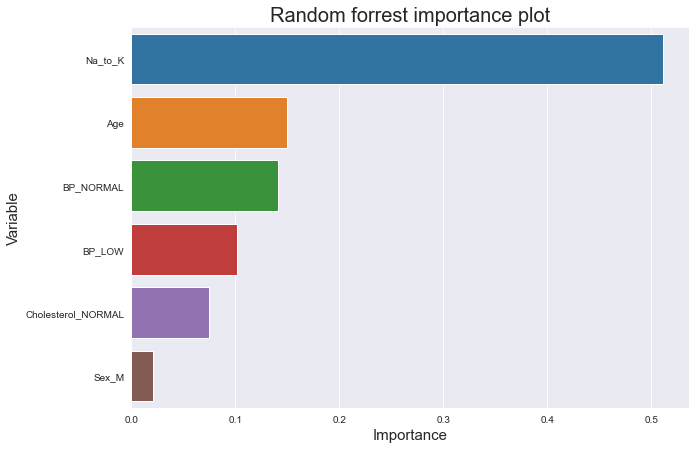

In [41]:
rf_importance = sorted(list(zip(X.columns, clf.feature_importances_)), 
                       key=lambda x: x[1],
                       reverse=True)
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(
    y=[i[0] for i in rf_importance], 
    x=[i[1] for i in rf_importance],
    orient="h")
plt.title("Random forrest importance plot", fontsize=20)
plt.ylabel('Variable', fontsize=15)
plt.xlabel("Importance", fontsize=15)
plt.show()

<span style="font-family:Georgia, Times New Roman ,Times,serif;">
    
Importance plots acquired with random forests may lead to conclusions that may turn out to be incorrect. There's option in `scikit-learn` that can be always used &mdash; `permutation_importance`.

In [42]:
from sklearn.inspection import permutation_importance

In [43]:
importance_results = permutation_importance(clf, X_test, y_test,
                      n_repeats=30,
                      random_state=42)
vals = sorted(list(zip(X.columns, importance_results['importances_mean'])),
              key=lambda x: x[1], reverse=True)

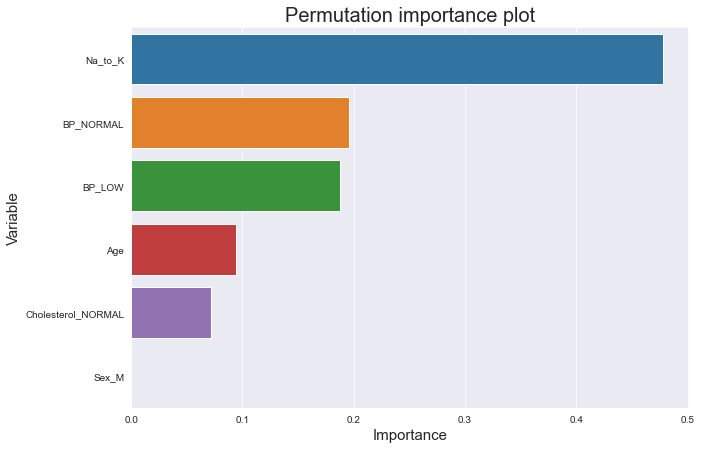

In [44]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(
    y=[i[0] for i in vals], 
    x=[i[1] for i in vals],
    orient="h")
plt.title("Permutation importance plot", fontsize=20)
plt.ylabel('Variable', fontsize=15)
plt.xlabel("Importance", fontsize=15)
plt.show()

<h2 style="font-family:Georgia, Times New Roman ,Times,serif;text-align:center;">There's so <em>much more &hellip;</em></h2>

<h3 style="font-family:Georgia, Times New Roman ,Times,serif;">Regression</h3>

In [45]:
from sklearn.datasets import load_diabetes, make_classification

In [46]:
loaded = load_diabetes()
X, y, feature_names = loaded['data'], loaded['target'], loaded['feature_names']
diabetes = pd.DataFrame(X, columns=feature_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
reg = LinearRegression()
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

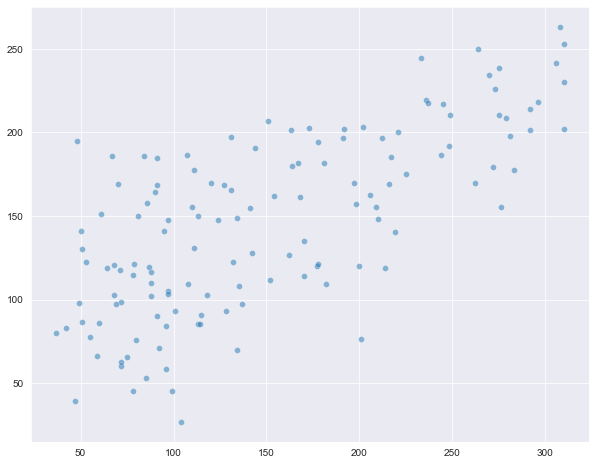

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
xs = np.arange(len(preds))
sns.scatterplot(x=y_test, y=preds, alpha=0.5)
plt.show()

In [50]:
# for regression task we need different metrics
from sklearn.metrics import max_error, mean_squared_error, mean_absolute_error

In [51]:
funcs = [max_error, mean_squared_error, mean_absolute_error]
list(map(lambda x: x(y_test, preds), funcs))

[146.69095350237893, 2972.9140567910504, 45.08212087763722]

<h3 style="font-family:Georgia, Times New Roman ,Times,serif;">Clusterization</h3>

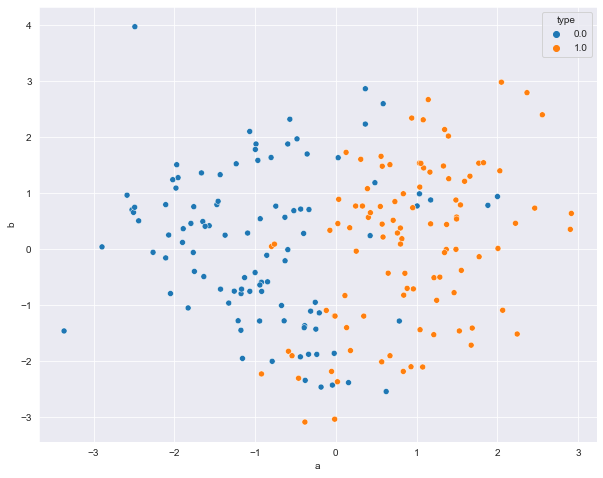

In [53]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, random_state=42)
X_ = pd.DataFrame(np.hstack([X, y.reshape(X.shape[0], 1)]), columns=["a", "b", "type"])
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="a", y="b", hue="type", data=X_)
plt.show()

In [54]:
# one of the most popular clusterization algorithms
from sklearn.cluster import KMeans

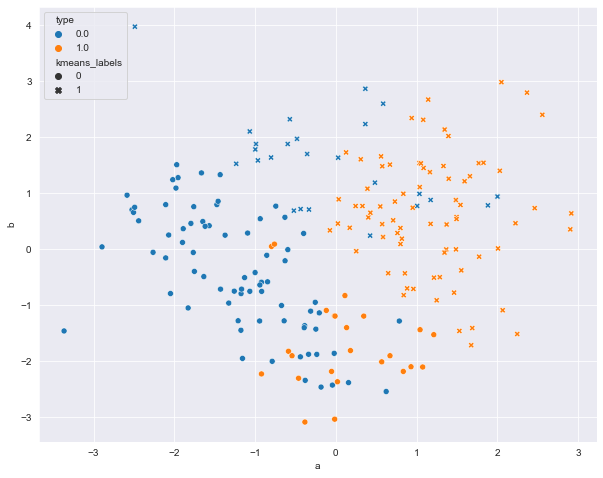

In [57]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_.reshape(X.shape[0], 1)
X_['kmeans_labels'] = labels
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x="a", y="b", hue="type", style="kmeans_labels", data=X_)
plt.show()

In [58]:
# wrong labels
print(str((X_['kmeans_labels'] != X_["type"]).sum() / len(X_) * 100) + "%")

24.5%


<h3 style="font-family:Georgia, Times New Roman ,Times,serif;">Dimension reduction</h3>

In [59]:
# how to present such data on plot? - it cannot be easily since there are 10 features
X, y = make_classification(n_samples=200, n_features=10, n_redundant=0, random_state=42)

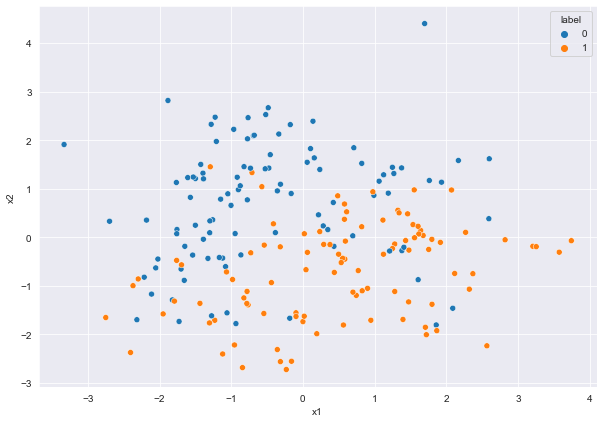

In [60]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_after_pca = pca.fit_transform(X)
df_after_pca = pd.DataFrame({'x1': X_after_pca[:, 0], 
                             'x2': X_after_pca[:, 1],
                             'label': y})
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x="x1", y="x2", data=df_after_pca, hue="label")
plt.show()

In [61]:
np.cumsum(pca.explained_variance_ratio_)

array([0.17353411, 0.32228864])

<h3 style="font-family:Georgia, Times New Roman ,Times,serif;">What's next?</h3>
<span style="font-family:Georgia, Times New Roman ,Times,serif;">
<ul>
    <li>hypertuning the algorithms</li>
    <li>cross-validation and more on models evaluation</li>
    <li>creating pipelines</li>
    <li>&hellip;</li>
</ul>

<h2 style="font-family:Georgia, Times New Roman ,Times,serif;">Useful links</h2>

<span style="font-family:Georgia, Times New Roman ,Times,serif;">
    
- [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Pandas docs](https://pandas.pydata.org/docs/)
- [Scikit-learn &mdash; preprocessing data](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing)
- [Metrics and scoring](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Supervised learning in Scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)
- [Advanced EDA in Python &mdash; nice article](https://miykael.github.io/blog/2022/advanced_eda/)

<h2 style="font-family:Georgia, Times New Roman ,Times,serif;">Invitation</h2>

Maybe pay some attention to this [kaggle competition](https://www.kaggle.com/c/spaceship-titanic?utm_medium=email&utm_source=gamma&utm_campaign=comp-spaceship-titanic-2022).